In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

url = "https://en.wikipedia.org/wiki/List_of_dams_and_reservoirs_in_Maharashtra"
urls = []

for var in range(1,2):
    url = ["https://en.wikipedia.org/wiki/List_of_dams_and_reservoirs_in_Maharashtra"]
    urls.append(url[0])

urls

['https://en.wikipedia.org/wiki/List_of_dams_and_reservoirs_in_Maharashtra']

In [2]:
def connect(ur):
    uClient = urlopen(ur)
    page_html = uClient.read()
    uClient.close()
    
    page_soup = soup(page_html, "html.parser")
    
    container = page_soup.findAll("table",{"style":"text-align:center; width:100%;"})
    return container

In [ ]:
con = connect(urls[0])
print(soup.prettify(con[0]))



In [4]:
strcon = str(con)

In [ ]:

strcon

In [6]:
import findspark
findspark.init()


In [23]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("html to sparkdataframe") \
    .getOrCreate()

#sc.setLogLevel(newLevel)

In [8]:
soup1 = soup(strcon,'html.parser')
data =[]

In [9]:
headers = [header.text for header in soup1.find_all('th')]

headers.append('undef')

headers[12] = 'Designed Spillway Cap m3per sec'


#headers


In [ ]:
for row in soup1.find_all('tr')[1:]:
    cols = row.find_all('td')
    data.append([col.text for col in cols])


#type(data)
data

In [11]:
df = pd.DataFrame(data, columns = headers)

df = df.drop('undef', axis=1)


In [12]:
df


,Name of Dam,Year Completed,River,Location,Type,Height (m),Length (m),Volume content (103m3),Gross Storage Capacity (103m3),Reservoir Area (103m2),Effective Storage Capacity (103m3),Purpose,Designed Spillway Cap m3per sec
0,Dhamapur,1600,Malvan,Sindhudurg,Earthfill,11,217,2687,,,,Irrigation,9.85
1,Vihar,1860,Vihar,Mumbai,Earthfill,25.6,817,353,41459.00,7270,41410.00,Water Supply,\n
2,Ekrukh,1871,Adela,Solapur,Earthfill,21.45,2360,130,61170.00,,61170.00,Irrigation Water Supply,1239\n
3,Shirsufal,1879,local,"Pune, Baramati",Earthfill,20.11,741,,10100.00,1601,9520.00,Irrigation,112\n
4,Tulshi,1879,Tulshi,Mumbai,EarthfillGravity,26,186,,10429.00,1350,10273.00,Water supply,640\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Wadishewadi,,Tapi,"Nandurbar, Shahada",Earthfill,36.5,614.5,324,92190.00,18230,91810.00,Irrigation,50529\n
269,Dehali,,Tapi,Sind Kheda,Earthfill,28.26,5349,1762,65060.00,1229,65060.00,Irrigation Water Supply,64227\n
270,Gose Khurd Dam,2008,Wainganga,Bhandara,Earthfill,22.50,11356,3828,769483.00,22258,376592.00,Irrigation,67300\n
271,Punad,,Delhi,"Nandurbar, Akkalkuva",Earthfill,29.62,1820,123,19080.00,2202,17290.00,Irrigation,\n


In [27]:
spark_df = spark.createDataFrame(df)

In [ ]:
spark_df.show()

In [29]:
from pyspark.sql.functions import regexp_replace


In [30]:
df_cleaned = spark_df.withColumn('Designed Spillway Cap m3per sec', regexp_replace('Designed Spillway Cap m3per sec','\n',''))

In [31]:
df_cleaned.show()

+-----------+--------------+-------------+------------------+----------------+----------+----------+----------------------+------------------------------+----------------------+----------------------------------+--------------------+-------------------------------+
|Name of Dam|Year Completed|        River|          Location|            Type|Height (m)|Length (m)|Volume content (103m3)|Gross Storage Capacity (103m3)|Reservoir Area (103m2)|Effective Storage Capacity (103m3)|             Purpose|Designed Spillway Cap m3per sec|
+-----------+--------------+-------------+------------------+----------------+----------+----------+----------------------+------------------------------+----------------------+----------------------------------+--------------------+-------------------------------+
|   Dhamapur|          1600|       Malvan|        Sindhudurg|       Earthfill|        11|       217|                  2687|                              |                      |                         

In [18]:
#spark.stop()

In [19]:
#type(df_cleaned)

pyspark.sql.dataframe.DataFrame

In [32]:
final_df = df_cleaned.toPandas()

In [33]:
final_df

,Name of Dam,Year Completed,River,Location,Type,Height (m),Length (m),Volume content (103m3),Gross Storage Capacity (103m3),Reservoir Area (103m2),Effective Storage Capacity (103m3),Purpose,Designed Spillway Cap m3per sec
0,Dhamapur,1600,Malvan,Sindhudurg,Earthfill,11,217,2687,,,,Irrigation,9.85
1,Vihar,1860,Vihar,Mumbai,Earthfill,25.6,817,353,41459.00,7270,41410.00,Water Supply,
2,Ekrukh,1871,Adela,Solapur,Earthfill,21.45,2360,130,61170.00,,61170.00,Irrigation Water Supply,1239
3,Shirsufal,1879,local,"Pune, Baramati",Earthfill,20.11,741,,10100.00,1601,9520.00,Irrigation,112
4,Tulshi,1879,Tulshi,Mumbai,EarthfillGravity,26,186,,10429.00,1350,10273.00,Water supply,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Wadishewadi,,Tapi,"Nandurbar, Shahada",Earthfill,36.5,614.5,324,92190.00,18230,91810.00,Irrigation,50529
269,Dehali,,Tapi,Sind Kheda,Earthfill,28.26,5349,1762,65060.00,1229,65060.00,Irrigation Water Supply,64227
270,Gose Khurd Dam,2008,Wainganga,Bhandara,Earthfill,22.50,11356,3828,769483.00,22258,376592.00,Irrigation,67300
271,Punad,,Delhi,"Nandurbar, Akkalkuva",Earthfill,29.62,1820,123,19080.00,2202,17290.00,Irrigation,


In [35]:
final_df.to_csv('maha_res.csv')

In [36]:
df_cleaned.write.format("json").mode("overwrite").save("maha_res.json")

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [56]:
import fiona

with fiona.open('new_maha_district.shp') as src:
    print(src.schema)


{'properties': {'fid': 'float:20', 'nam': 'str:254', 'laa': 'str:254'}, 'geometry': '3D Polygon'}


In [64]:
maha_shape = gpd.read_file('new_maha_district.shp')

type(maha_shape)

geopandas.geodataframe.GeoDataFrame

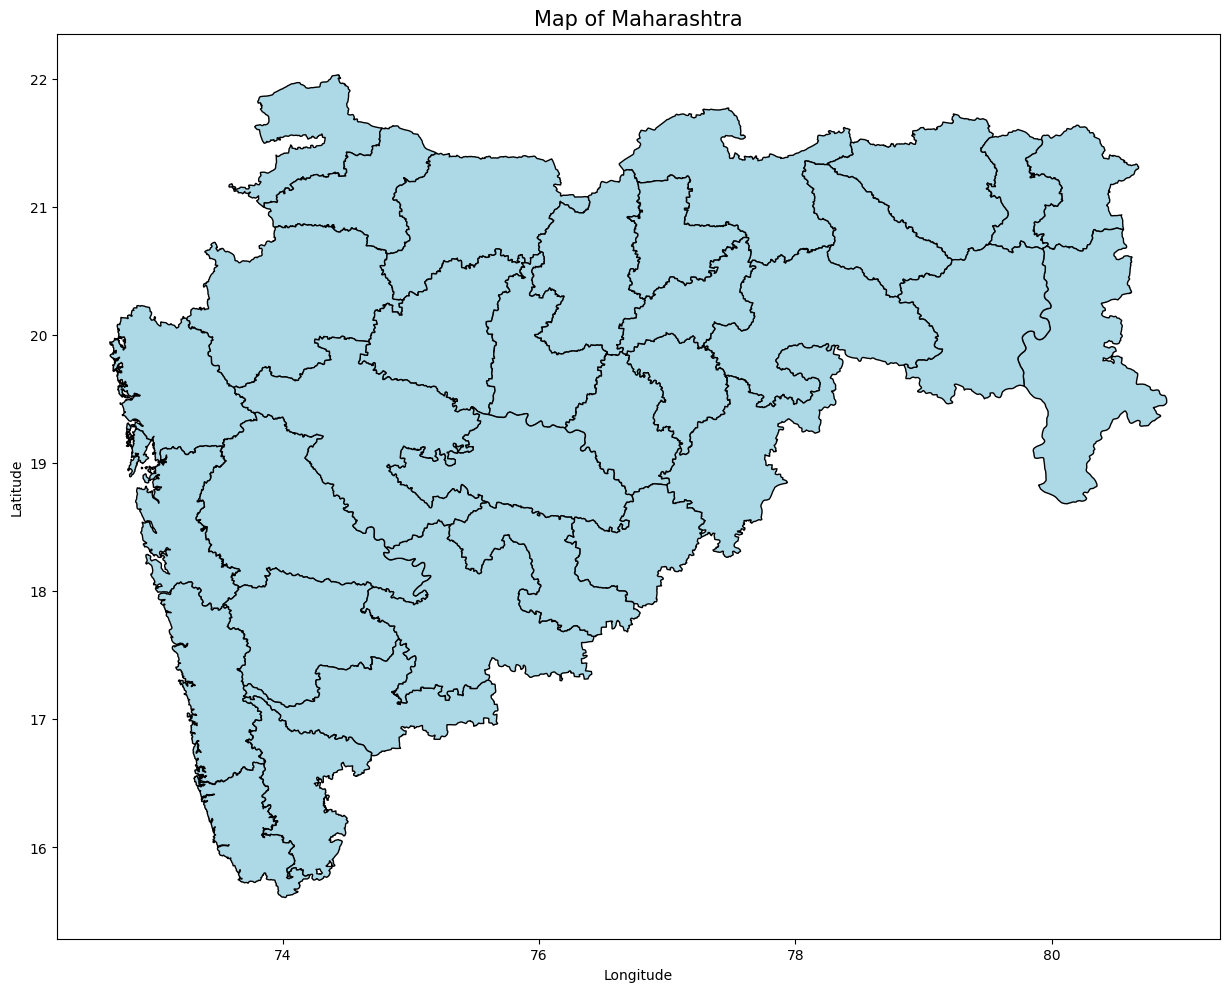

In [65]:
# Plotting the map
fig, ax = plt.subplots(figsize=(15, 15))
maha_shape.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title and labels if needed
ax.set_title('Map of Maharashtra', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [ ]:
#pointson_gdf = gpd.GeoDataFrame(final_df, geometry=geometry)

# Plot the data points on top of the base map
#pointson_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
